<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

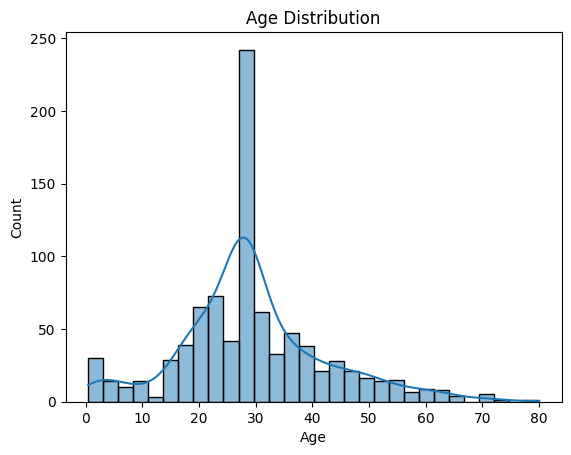

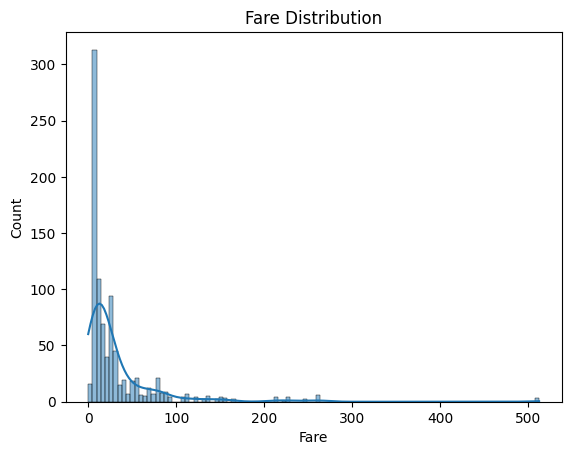

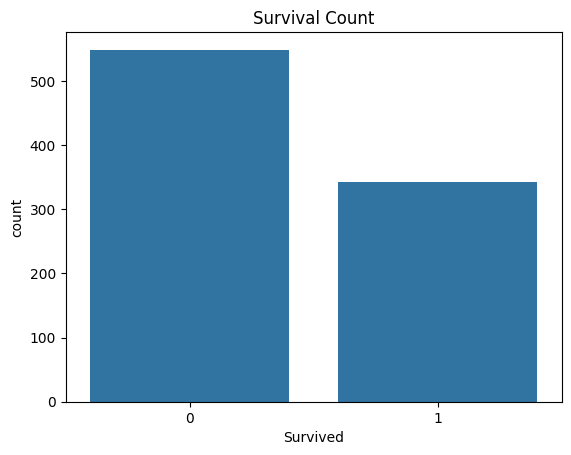

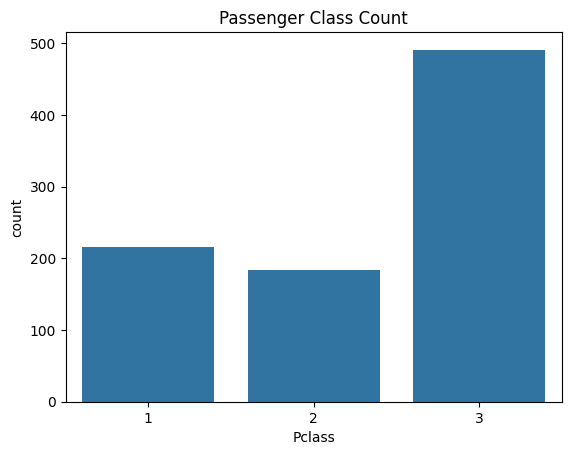

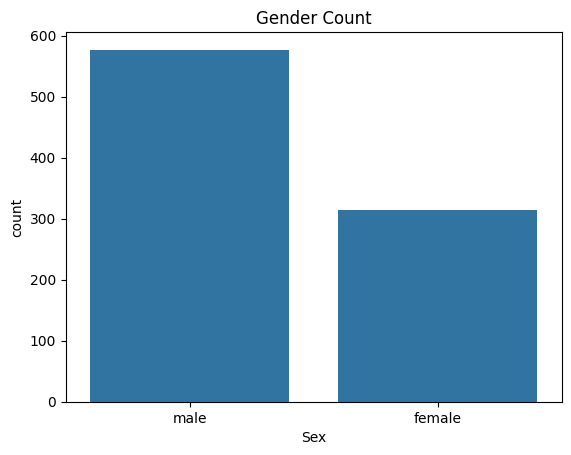

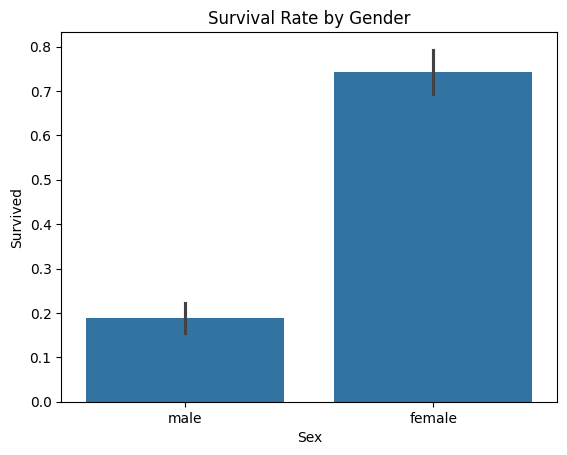

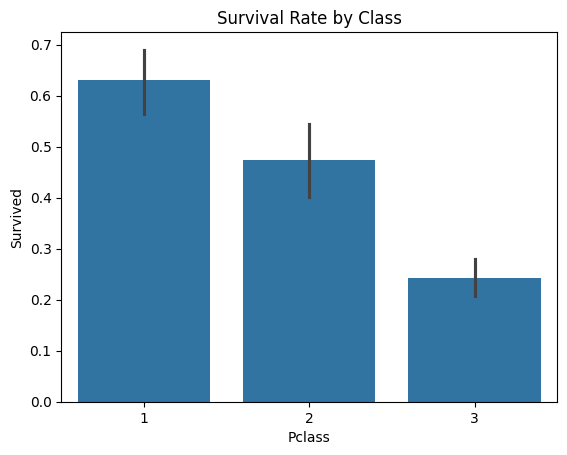

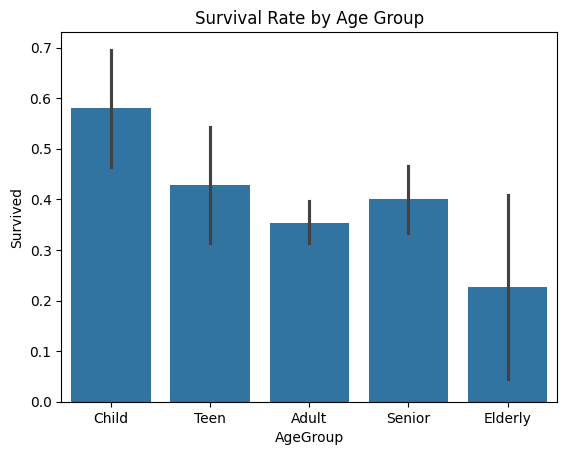

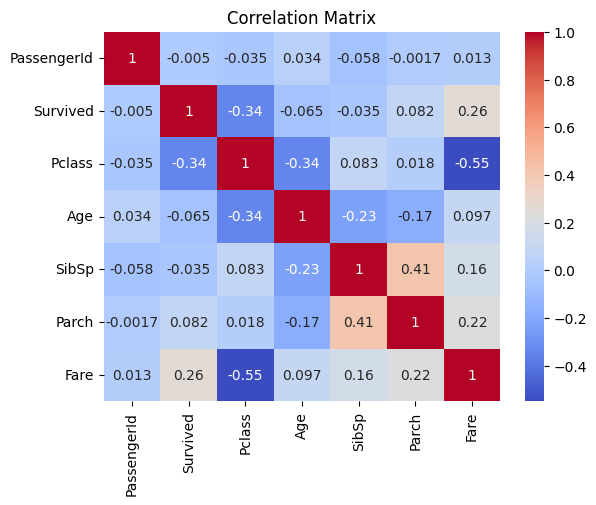

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


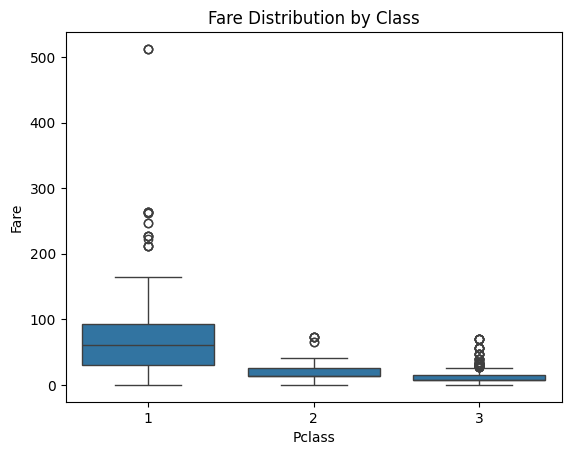


Key Findings:
1. ...
2. ...
3. ...



In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '/content/train.csv'  # Replace with the actual file path
titanic_df = pd.read_csv(file_path)

# Step 2: Data Cleaning
# Display basic information about the dataset
print(titanic_df.info())

# Check for missing values
print(titanic_df.isnull().sum())

# Fill missing values
# Age: Fill with median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Embarked: Fill with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Cabin: Drop the column (too many missing values)
titanic_df.drop('Cabin', axis=1, inplace=True)

# Verify that there are no more missing values
print(titanic_df.isnull().sum())

# Step 3: Exploratory Data Analysis (EDA)
# Summary statistics
print(titanic_df.describe())

# Visualize the distribution of numerical features
sns.histplot(titanic_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(titanic_df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# Visualize categorical features
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count')
plt.show()

sns.countplot(x='Pclass', data=titanic_df)
plt.title('Passenger Class Count')
plt.show()

sns.countplot(x='Sex', data=titanic_df)
plt.title('Gender Count')
plt.show()

# Explore relationships between variables
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Class')
plt.show()

# Survival rate by age group
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 12, 18, 35, 60, 120], labels=['Child', 'Teen', 'Adult', 'Senior', 'Elderly'])
sns.barplot(x='AgeGroup', y='Survived', data=titanic_df)
plt.title('Survival Rate by Age Group')
plt.show()

# Correlation matrix
numerical_df = titanic_df.select_dtypes(include=['float', 'int'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 4: Identify patterns and trends
# Group by Pclass and Sex and compute the mean survival rate
grouped = titanic_df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print(grouped)

# Fare distribution by Pclass
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Class')
plt.show()

# Conclusion: Summarize findings (replace with your own observations)
print("""
Key Findings:
1. ...
2. ...
3. ...
""")